In [2]:
from light_curves import LightCurve
from exposures import Calexp
from task import Run

Run(): class to process and save a bunch of light curves in the same calexps.
* For each Run() instance, all of the data is saved in a folder with the date and time name.

### Main structure

- Create a Run() instance and a list of parameters (dict).
- Add the light curves choosing the params and location (setting ra/dec or a random point within a distance from the first light curve location)
- Add a check point (log_task)

runs/20241106_151356/
(ra,dec) = (57.67048780800139, -32.49757834967935)/nHTM_ID = 9871863798730 - HTM_level=20 (bounded by a circle of radius ~0.27 arcsec.)
Found 150 calexps


/home/karennowo/DP0_microlensing/light_curves.py:107: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.data = pd.concat([self.data, new_data], ignore_index=True)


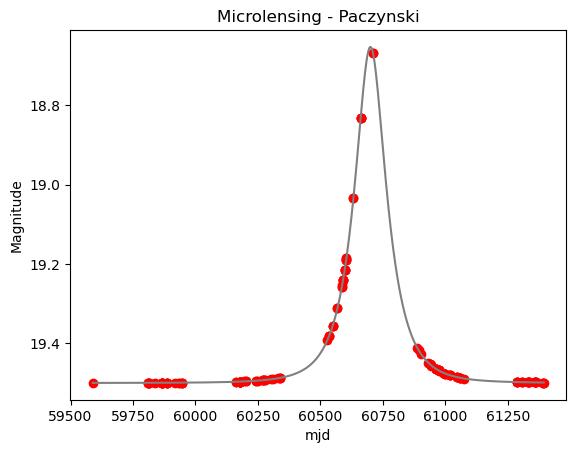

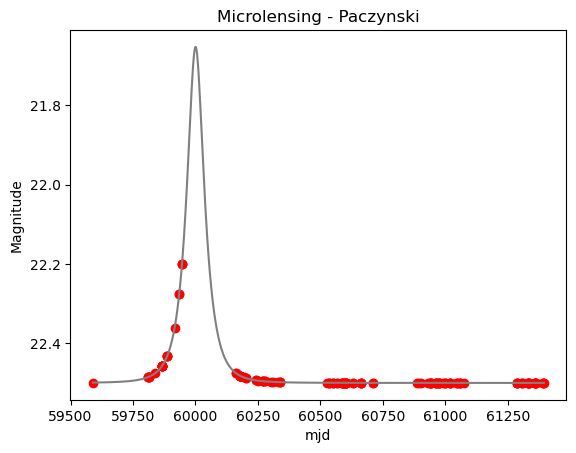

[LightCurve (57.67048780800139, -32.49757834967935) - Band i - Points: 150,
 LightCurve (57.59451632893858, -32.481152201226145) - Band i - Points: 150]

In [3]:
process = Run()
print(process.main_path)
params = [{"t_0": 60700.5, "t_E": 110, "u_0": 0.5, "m_base": 19.5},
          {"t_0": 60000.5, "t_E": 60, "u_0": 0.5, "m_base": 22.5}]

# for p in params:
#     process.add_lc(p, dist=0.2)

process.add_lc(params[0], ra=57.67048780800139, dec=-32.49757834967935, plot=True)

# process.add_lc(params[1], dist=0.2) 
process.add_lc(params[1], ra=57.59451632893858, dec=-32.481152201226145, plot = True)

process.log_task("Add and simulate light curves", det = len(params))
process.inj_lc # List of injected light curves

- Set and configure tasks to be used in the injection-extraction process

Iterate over the collected calexp:
- Injection
- Measure (contains the entire process with the selected approach)
- Find fluxes in source detected table (needed for this approach but others approachs might not need it)
- Compute magnitudes

In [4]:
# Set and config tasks
process.inject_task()
schema = process.measure_task()
print(process.tasks) # Saved tasks used
# Iterate on collected calexps 
for j, dataId in enumerate(process.calexp_dataIds[:10]):
    print(f" ------ CALEXP {j} ------")
    calexp = Calexp(dataId)
    injected_exp, injected_points = process.inject_calexp(calexp, save_fit=f"calexp_{j}.fit")
    if injected_exp != None:
        # Approach to measure fluxes and save them in LightCurve.data
        sources = process.measure_calexp(injected_exp, schema)
        flux, flux_err = process.find_flux(sources, injected_points, save=dataId)
        # Compute and save magnitudes in LightCurve.data
        for f, ferr, lc in zip(flux, flux_err, process.inj_lc):
            mag, mag_err = lc.add_mag(f, ferr, dataId, exposure = injected_exp)
            print(f"ra = {lc.ra}, dec = {lc.dec}")
            print("Measured ", mag, mag_err)
            print("Injected ", lc.data["mag_sim"][j])


{'Injection': <lsst.source.injection.inject_visit.VisitInjectTask object at 0x79c0943c0190>, 'Detection': <lsst.meas.algorithms.detection.SourceDetectionTask object at 0x79c092bb1450>, 'Measurement': <lsst.meas.base.sfm.SingleFrameMeasurementTask object at 0x79c092bb1810>}
 ------ CALEXP 0 ------
Points injected: 2


Founded point in source table in 0 iteration/s
Founded point in source table in 1 iteration/s
ra = 57.67048780800139, dec = -32.49757834967935
Measured  19.498109926099264 0.006980738488794427
Injected  19.499800399179982
ra = 57.59451632893858, dec = -32.481152201226145
Measured  22.57480638808502 0.07916677384768492
Injected  22.499103566670836
 ------ CALEXP 1 ------
Points injected: 2


Founded point in source table in 0 iteration/s
Founded point in source table in 4 iteration/s
ra = 57.67048780800139, dec = -32.49757834967935
Measured  19.50012987549382 0.006595379180866676
Injected  19.499526457030296
ra = 57.59451632893858, dec = -32.481152201226145
Measured  22.51556758137157 0.06701109253953615
Injected  22.485433057027446
 ------ CALEXP 2 ------
No point is contained in the calexp
 ------ CALEXP 3 ------
Points injected: 1


Founded point in source table in 0 iteration/s
ra = 57.67048780800139, dec = -32.49757834967935
Measured  19.498855492699462 0.006581691624646404
Injected  19.499526450553148
 ------ CALEXP 4 ------
Points injected: 1


Founded point in source table in 0 iteration/s
ra = 57.67048780800139, dec = -32.49757834967935
Measured  19.50166914416004 0.00631328219172367
Injected  19.499520247493123
 ------ CALEXP 5 ------
Points injected: 1


Founded point in source table in 0 iteration/s
ra = 57.67048780800139, dec = -32.49757834967935
Measured  19.50154598982258 0.006235372934090365
Injected  19.499520246553935
 ------ CALEXP 6 ------
Points injected: 1


Founded point in source table in 0 iteration/s
ra = 57.67048780800139, dec = -32.49757834967935
Measured  19.499106077841596 0.006470421069794748
Injected  19.499520173952803
 ------ CALEXP 7 ------
Points injected: 2


Founded point in source table in 0 iteration/s
Founded point in source table in 1 iteration/s
ra = 57.67048780800139, dec = -32.49757834967935
Measured  19.488635145081386 0.007456380890095316
Injected  19.499466563033558
ra = 57.59451632893858, dec = -32.481152201226145
Measured  22.55327951566271 0.09110823608880489
Injected  22.476119840339543
 ------ CALEXP 8 ------
Points injected: 2


Founded point in source table in 0 iteration/s
Founded point in source table in 4 iteration/s
ra = 57.67048780800139, dec = -32.49757834967935
Measured  19.493338197701963 0.008944044003330105
Injected  19.499392031847123
ra = 57.59451632893858, dec = -32.481152201226145
Measured  22.49355313574315 0.11530354876803718
Injected  22.457189257087737
 ------ CALEXP 9 ------
Points injected: 2


Founded point in source table in 0 iteration/s
Founded point in source table in 0 iteration/s
ra = 57.67048780800139, dec = -32.49757834967935
Measured  19.493888390676485 0.00881718746999753
Injected  19.499392026419127
ra = 57.59451632893858, dec = -32.481152201226145
Measured  22.458575646078277 0.10919434475705991
Injected  22.457187486571378


### Outputs

* Plot final light curves and show its data (data frame)
* Save the lc as csv

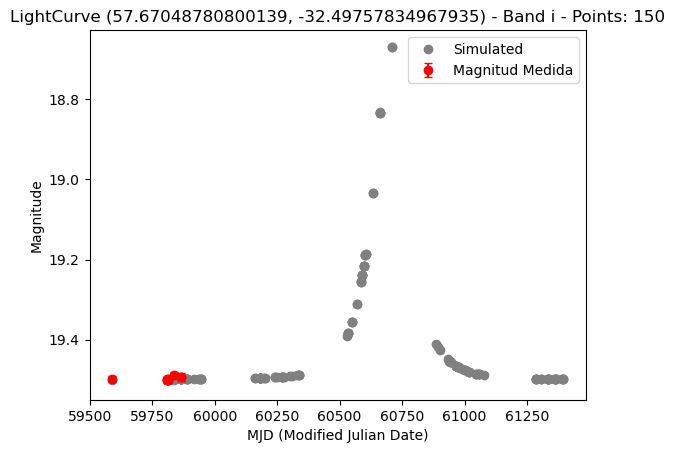

  detector   visit           mjd    mag_sim          flux    flux_err  \
0      117    6855  59589.214718  19.499800  86892.818643  558.114990   
1      152  174579  59810.371401  19.499526  87187.487329  528.848557   
2      151  174579  59810.371401  19.499526           NaN         NaN   
3       65  174586  59810.374548  19.499526  87331.494775  528.311599   
4       72  177422  59813.364076  19.499520  87090.075489  505.711685   
5      184  177423  59813.364525  19.499520  87154.038128  499.663057   
6       53  177480  59813.399230  19.499520  87207.991847  518.832736   
7       41  192356  59837.382866  19.499467  88050.447289  603.606252   
8       87  211142  59866.163724  19.499392  87011.139849  716.283863   
9       64  211146  59866.165658  19.499392  87127.264537  706.952891   

         mag   mag_err  
0  19.498110  0.006981  
1  19.500130  0.006595  
2        NaN       NaN  
3  19.498855  0.006582  
4  19.501669  0.006313  
5  19.501546  0.006235  
6  19.499106  0.00647

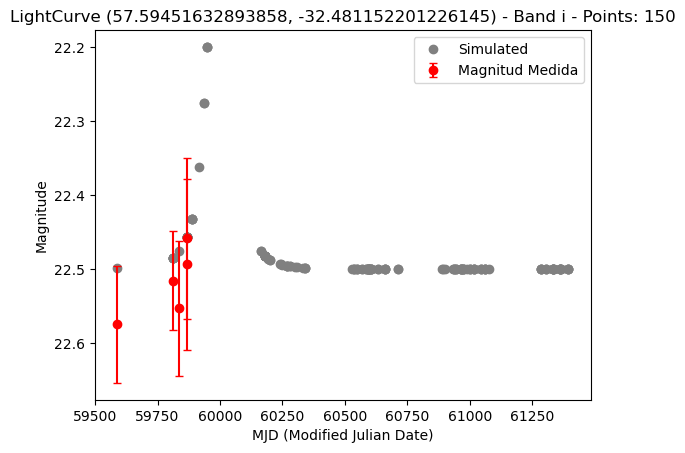

  detector   visit           mjd    mag_sim         flux    flux_err  \
0      117    6855  59589.214718  22.499104   5108.64001  372.495072   
1      152  174579  59810.371401  22.485433  5423.492944  334.730498   
2      151  174579  59810.371401  22.485433          NaN         NaN   
3       65  174586  59810.374548  22.485432          NaN         NaN   
4       72  177422  59813.364076  22.484649          NaN         NaN   
5      184  177423  59813.364525  22.484649          NaN         NaN   
6       53  177480  59813.399230  22.484640          NaN         NaN   
7       41  192356  59837.382866  22.476120  5234.483296  439.240028   
8       87  211142  59866.163724  22.457189  5488.945046  582.915277   
9       64  211146  59866.165658  22.457187  5679.095566  571.153177   

         mag   mag_err  
0  22.574806  0.079167  
1  22.515568  0.067011  
2        NaN       NaN  
3        NaN       NaN  
4        NaN       NaN  
5        NaN       NaN  
6        NaN       NaN  
7   22.

In [5]:
for lc in process.inj_lc:
    lc.plot()
    print(lc.data[:10])
process.save_lc()

- Time log file
- Plot duration (time_analysis)

In [6]:
# time_log.csv
import pandas as pd
data_log = process.log # Need to change it to be a DataFrame, not a dict

process.save_time_log()
pd.DataFrame(data_log)[:10]

,task,time,detail
0,Start,1.730906e+09,NaN
1,Add and simulate light curves,1.730906e+09,2.0
2,Injection,1.730906e+09,NaN
3,Detection,1.730906e+09,2611.0
4,Measurement,1.730906e+09,NaN
5,Finding points,1.730906e+09,2.0
6,Injection,1.730906e+09,NaN
7,Detection,1.730906e+09,3123.0
8,Measurement,1.730906e+09,NaN
9,Finding points,1.730906e+09,2.0


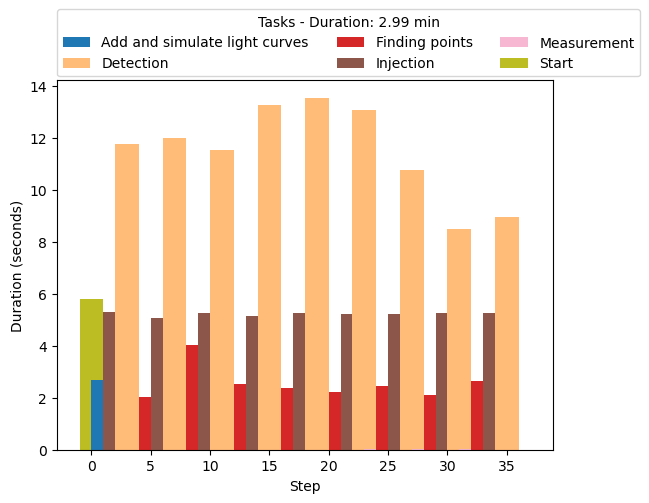

In [7]:
process.time_analysis()

In [8]:
process.inject_table

injection_id,injection_flag,injection_draw_size,visit,detector,ra,dec,source_type,exp_midpoint,mag
int64,int64,int64,int64,int64,float64,float64,str13,float64,float64
0,0,24,6855,117,57.67048780800139,-32.49757834967935,DeltaFunction,59589.21471821991,19.499800399179982
1,0,24,6855,117,57.59451632893858,-32.481152201226145,DeltaFunction,59810.37140122453,22.485433057027446
0,0,20,174579,152,57.67048780800139,-32.49757834967935,DeltaFunction,59589.21471821991,19.499800399179982
1,0,20,174579,152,57.59451632893858,-32.481152201226145,DeltaFunction,59810.37140122453,22.485433057027446
0,0,20,174586,65,57.67048780800139,-32.49757834967935,DeltaFunction,59589.21471821991,19.499800399179982
0,0,20,177422,72,57.67048780800139,-32.49757834967935,DeltaFunction,59589.21471821991,19.499800399179982
0,0,20,177423,184,57.67048780800139,-32.49757834967935,DeltaFunction,59589.21471821991,19.499800399179982
0,0,20,177480,53,57.67048780800139,-32.49757834967935,DeltaFunction,59589.21471821991,19.499800399179982
0,0,20,192356,41,57.67048780800139,-32.49757834967935,DeltaFunction,59589.21471821991,19.499800399179982
